<a href="https://colab.research.google.com/github/bluisfernandes/SBA-004/blob/main/queimadas_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualização - Imagens

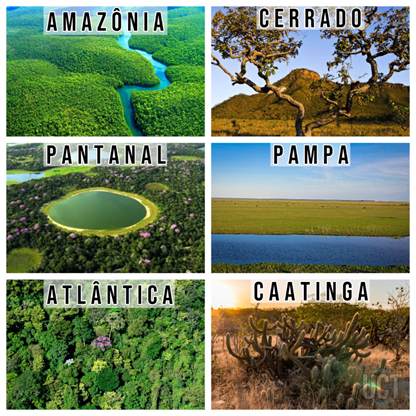

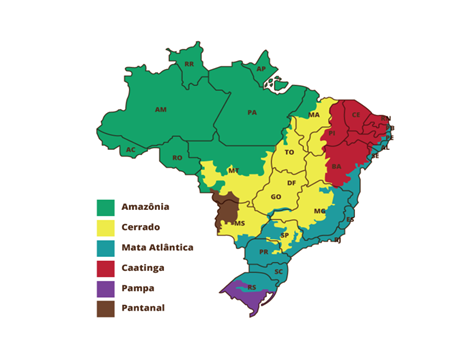



---



Pantanal:
 
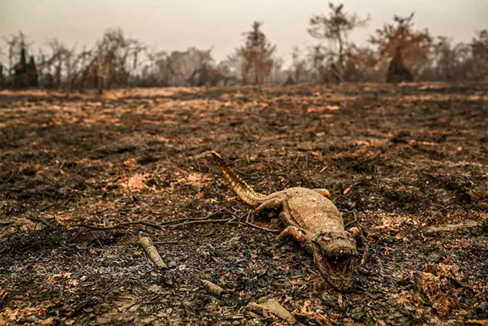

(Amanda Perobelli/Reuters)


Amazonia:

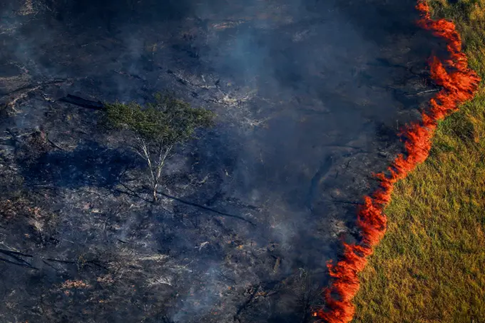

(Bruno Kelly/Reuters)


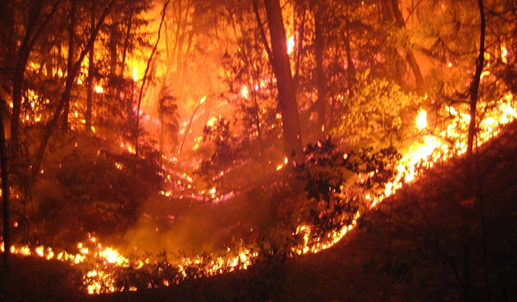

(Fernando Gualtieri)

Cerrado:

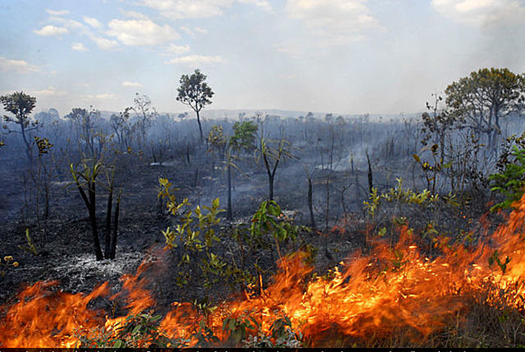


(Rafael Tatemoto)



# Bibliotecas

In [2]:
!pip install geopandas
!pip install contextily

import pandas as pd
import geopandas as gpd       
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point # shapefile e conversões de coordenadas
import contextily  #imagem de fundo nos mapas
import xyzservices.providers as xyz #imagem de fundo nos mapas


     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.3 MB 46.7 MB/s 
     |████████████████████████████████| 19.3 MB 6.0 MB/s 


# Dados

### Importando dados

In [3]:
df_2020 = pd.read_csv('https://raw.githubusercontent.com/bluisfernandes/SBA-004/main/data/Focos_2020-01-01_2020-12-31.csv')
df_2021 = pd.read_csv('https://raw.githubusercontent.com/bluisfernandes/SBA-004/main/data/Focos_2021-01-01_2021-10-21.csv')

In [4]:
df = pd.concat([df_2020, df_2021])

In [5]:
type(df)

pandas.core.frame.DataFrame

### Manipulando datas

In [6]:
df['datahora'] = pd.to_datetime(df['datahora'])
df.head()

datahora  satelite    pais  ... latitude longitude   frp
0 2020-07-11 16:50:00  AQUA_M-T  Brasil  ...  -15.914   -48.868  11.0
1 2020-07-11 16:50:00  AQUA_M-T  Brasil  ...  -15.911   -48.864   9.5
2 2020-07-11 16:45:00  AQUA_M-T  Brasil  ...  -21.897   -42.340  13.0
3 2020-07-11 16:50:00  AQUA_M-T  Brasil  ...  -14.838   -43.881  17.6
4 2020-07-11 16:50:00  AQUA_M-T  Brasil  ...   -1.823   -55.207  18.7

[5 rows x 12 columns]

In [7]:
# df['year'] = df['datahora'].apply(lambda x: int (x[0:4]))
# df['month'] = df['datahora'].apply(lambda x: int (x[5:7]))
# df['day'] = df['datahora'].apply(lambda x: int (x[8:10]))
# df

### Manipulando dados

Alterando os valores "-999" de riscofogo para 0

In [8]:
df['riscofogo'] = df['riscofogo'].replace(-999, 0)

### Manipulando Coordenadas

Criando Ponto com coordenadas locais 


In [9]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
df = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=geometry)

Alterando coordenadas

In [10]:
df = df.to_crs(crs='EPSG:3857')
df

datahora  satelite  ...   frp                           geometry
0      2020-07-11 16:50:00  AQUA_M-T  ...  11.0  POINT (-5439960.876 -1794765.623)
1      2020-07-11 16:50:00  AQUA_M-T  ...   9.5  POINT (-5439515.598 -1794418.358)
2      2020-07-11 16:45:00  AQUA_M-T  ...  13.0  POINT (-4713267.240 -2499163.337)
3      2020-07-11 16:50:00  AQUA_M-T  ...  17.6  POINT (-4884810.575 -1670537.264)
4      2020-07-11 16:50:00  AQUA_M-T  ...  18.7   POINT (-6145615.128 -202969.680)
...                    ...       ...  ...   ...                                ...
161618 2021-07-01 17:20:00  AQUA_M-T  ...  19.1   POINT (-5626087.065 -647541.834)
161619 2021-07-01 17:20:00  AQUA_M-T  ...  26.4   POINT (-5548052.102 -607272.706)
161620 2021-07-01 17:20:00  AQUA_M-T  ...  32.7   POINT (-6186024.103 -682798.381)
161621 2021-07-01 17:20:00  AQUA_M-T  ...   4.5   POINT (-6229661.344 -556411.305)
161622 2021-07-01 17:20:00  AQUA_M-T  ...   7.9   POINT (-6595123.232 -502458.490)

[384420 rows x 13 columns]

In [11]:
# df.crs.to_string()  #não sei se é necessário

# Biomas Brasileiros

arquivo shapefile (vetores): [IBGE](https://www.ibge.gov.br/geociencias/cartas-e-mapas/informacoes-ambientais/15842-biomas.html?=&t=acesso-ao-produto)

In [12]:
import os
from urllib.request import urlretrieve
import zipfile

In [13]:
if not os.path.exists('/queimadas'):
    os.makedirs('/queimadas')

In [14]:
url_biomas = 'https://raw.githubusercontent.com/bluisfernandes/SBA-004/main/data/Biomas_250mil.zip'

In [15]:
# %%time

urlretrieve(url_biomas, '/queimadas/Biomas_250mil.zip')

('/queimadas/Biomas_250mil.zip', <http.client.HTTPMessage at 0x7f91ba3ae510>)

In [16]:
with zipfile.ZipFile('/queimadas/Biomas_250mil.zip', 'r') as zip_ref:
    zip_ref.extractall('/queimadas/')

In [17]:
os.remove('/queimadas/Biomas_250mil.zip')

In [18]:
brasil_biomas = gpd.read_file('/queimadas/lm_bioma_250.shp')

In [19]:
# brasil_biomas

In [20]:
# brasil_biomas.iloc[0].geometry

In [21]:
brasil_biomas.crs.to_string()

'EPSG:4674'

In [22]:
brasil_biomas.to_crs(epsg=3857, inplace=True)

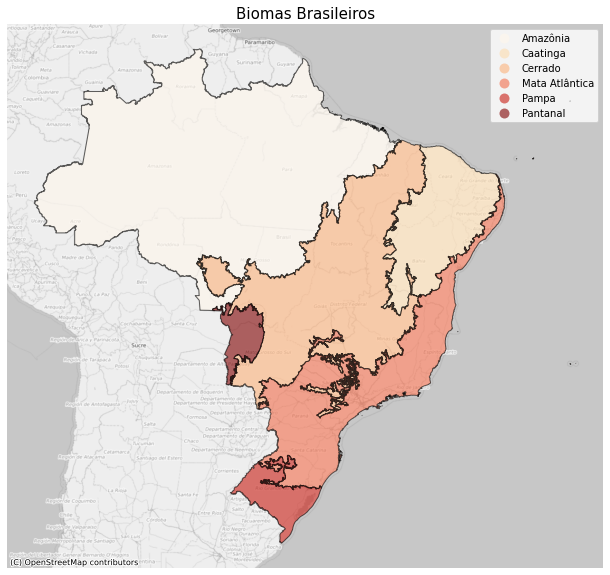

In [23]:
ax = brasil_biomas.plot(figsize=(15, 10), edgecolor='black', column='Bioma' , alpha=.6, cmap='OrRd', legend=True)
# ax = queimadas_risco.plot(figsize=(15, 10), column = 'bioma', markersize=15, legend=True, categories=biomas)
contextily.add_basemap(ax, source= xyz.OpenStreetMap.BlackAndWhite)
ax.set_axis_off()
ax.set_title('Biomas Brasileiros', fontsize=15)
plt.show()

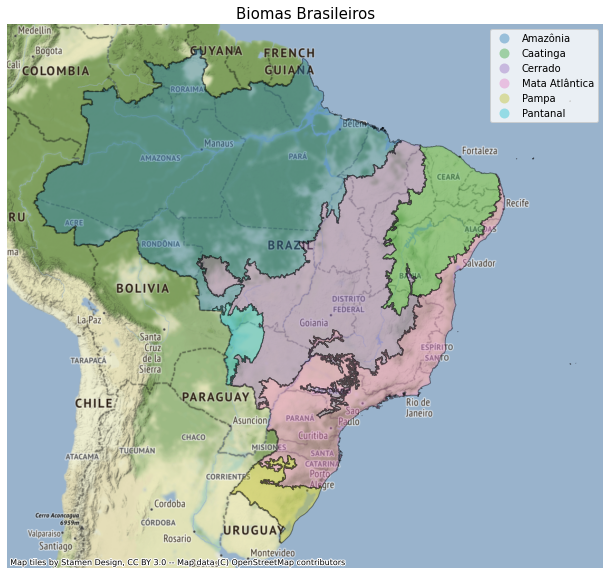

In [24]:
ax = brasil_biomas.plot(figsize=(15, 10), edgecolor='black', column='Bioma' , alpha=.4, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title('Biomas Brasileiros', fontsize=15)
plt.show()

# Risco queimada última semana

Queimadas apartir de 14/10/2021

In [46]:
queimadas_risco = df
filtro_data = queimadas_risco['datahora'] > pd.Timestamp('20210923')

queimadas_risco = queimadas_risco[filtro_data]
filtro_risco = queimadas_risco['riscofogo'] >= 1
queimadas_risco = queimadas_risco[filtro_risco]


In [47]:
biomas = ['Amazonia','Cerrado', 'Pantanal', 'Caatinga', 'Mata Atlantica', 'Pampa']

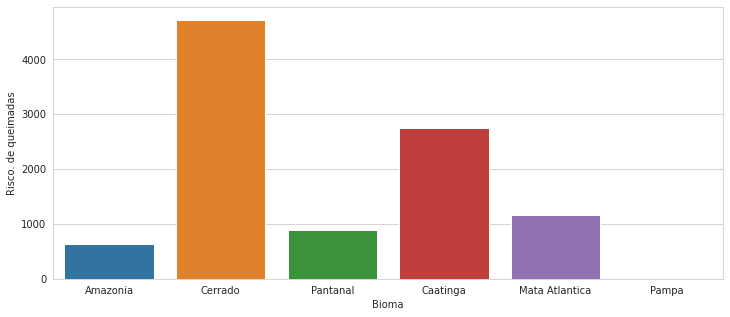

In [48]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='bioma', data=queimadas_risco, order=biomas)
ax.set_xlabel('Bioma')
ax.set_ylabel('Risco. de queimadas')
plt.show()

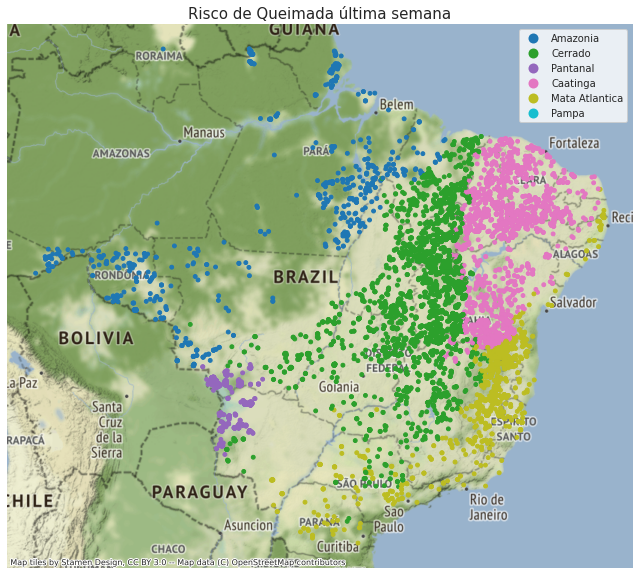

In [49]:
ax = queimadas_risco.plot(figsize=(15, 10), column = 'bioma', markersize=15, legend=True, categories=biomas)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title('Risco de Queimada última semana', fontsize=15)
plt.show()

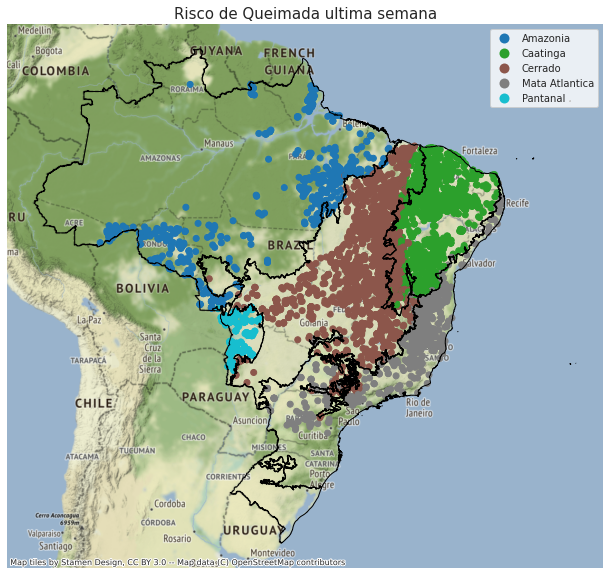

In [52]:
ax = brasil_biomas.plot(figsize=(15, 10), edgecolor='black', facecolor='none', zorder=2)
queimadas_risco.plot(ax=ax, column='bioma',legend=True, zorder=1)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title('Risco de Queimada ultima semana', fontsize=15)
plt.show()

# Municípios com maiores focos de queimada

In [51]:
from collections import Counter
cities = Counter(df['municipio']).most_common()[0:20]
cities

[('CORUMBA', 11875),
 ('ALTAMIRA', 7767),
 ('SAO FELIX DO XINGU', 7448),
 ('PORTO VELHO', 6793),
 ('POCONE', 6239),
 ('LABREA', 5727),
 ('APUI', 4737),
 ('NOVO PROGRESSO', 4362),
 ('BARAO DE MELGACO', 4040),
 ('CACERES', 3826),
 ('COLNIZA', 3306),
 ('FEIJO', 3068),
 ('NOVO ARIPUANA', 2916),
 ('ITAITUBA', 2902),
 ('PORTO MURTINHO', 2886),
 ('BOCA DO ACRE', 2589),
 ('MANICORE', 2352),
 ('LAGOA DA CONFUSAO', 2205),
 ('ARIPUANA', 2072),
 ('SENA MADUREIRA', 2052)]

In [31]:
municipios_criticos = []
for city in cities:
  municipios_criticos.append(city[0])

In [32]:
filtro = []
for i in df['municipio']:
  for j in municipios_criticos:
    if i == j:
      filtro.append(True)
      break
  else:
    filtro.append(False)
len(filtro)

384420

In [33]:
df_municipios_criticos = df[filtro]

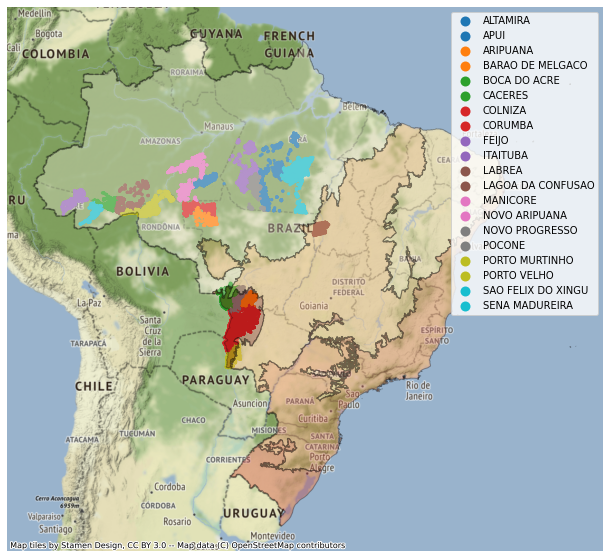

In [34]:
ax = df_municipios_criticos.plot(figsize=(15, 10), column = 'municipio', markersize=5, legend=True)
brasil_biomas.plot(ax=ax, edgecolor='black', column='Bioma' , alpha=.3, cmap='OrRd')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

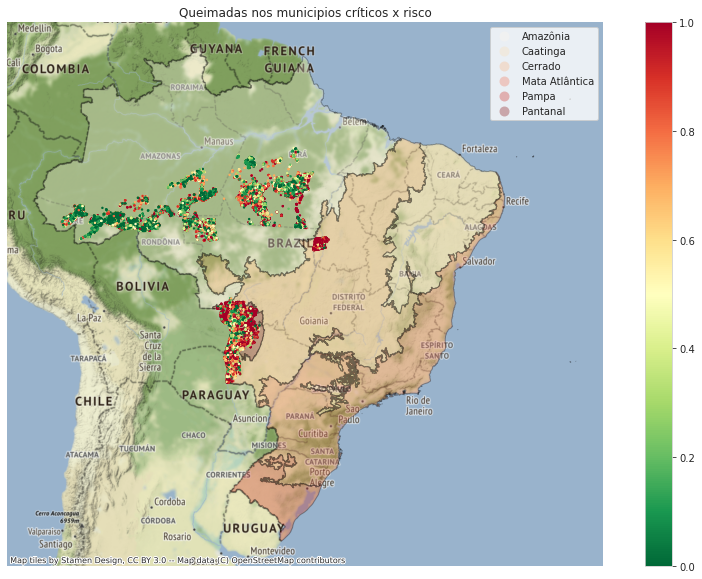

In [53]:
ax = df_municipios_criticos.plot(figsize=(15, 10), column = 'riscofogo', markersize=2, cmap='RdYlGn_r', legend=True, zorder=2)
brasil_biomas.plot(ax=ax, edgecolor='black', column='Bioma' , alpha=.3, cmap='OrRd', legend=True, zorder=1)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title("Queimadas nos municipios críticos x risco")
plt.show()

# Queimadas Alto vs Baixo Risco

In [36]:
df_queimadas_alto_risco = df[df['riscofogo'] == 1]
df_queimadas_baixo_risco = df[df['riscofogo'] < 1]

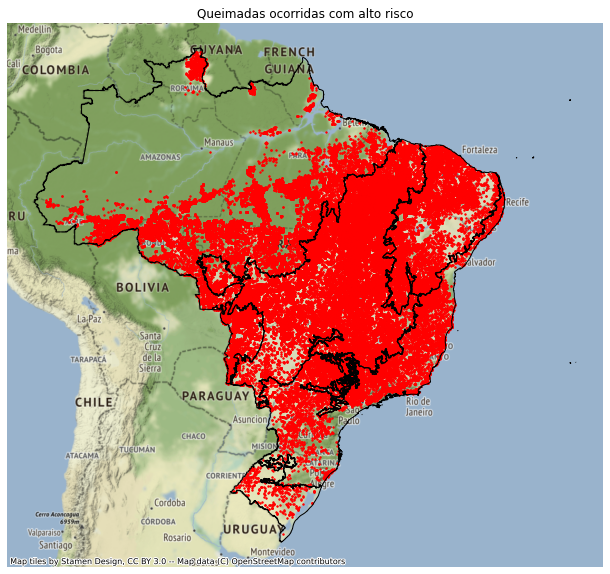

In [37]:
ax = df_queimadas_alto_risco.plot(figsize=(15, 10), markersize=2, legend=True, color='red', zorder=2)
# df_queimadas_alto_risco.plot(ax=ax,legend=True, markersize=1, color='red', zorder=1)
brasil_biomas.plot(ax=ax, edgecolor='black', facecolor='none', zorder=3)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title('Queimadas ocorridas com alto risco')
plt.show()

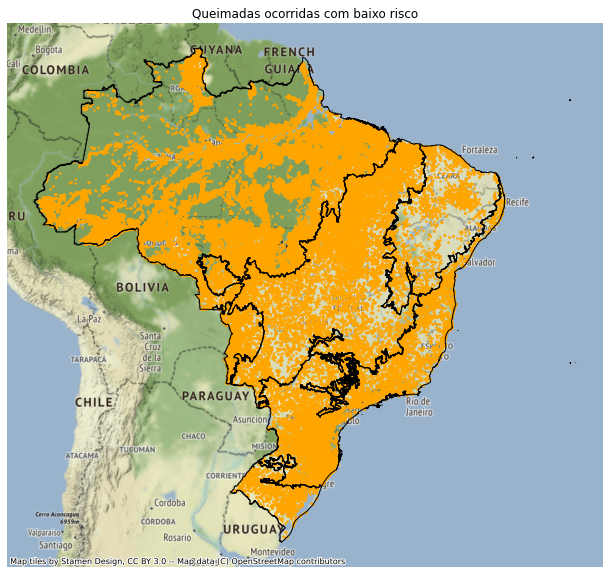

In [38]:
ax = df_queimadas_baixo_risco.plot(figsize=(15, 10), markersize=2, legend=True, color='orange', zorder=2)
# df_queimadas_alto_risco.plot(ax=ax,legend=True, markersize=1, color='red', zorder=1)
brasil_biomas.plot(ax=ax, edgecolor='black', facecolor='none', zorder=3)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title('Queimadas ocorridas com baixo risco')
plt.show()

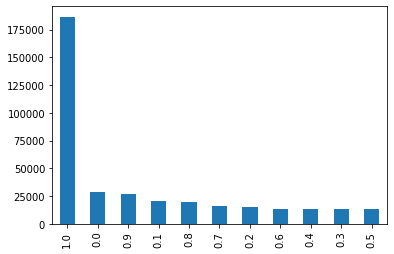

In [39]:
riscos = df.riscofogo.value_counts().plot.bar()

# Testes

## teste mapas

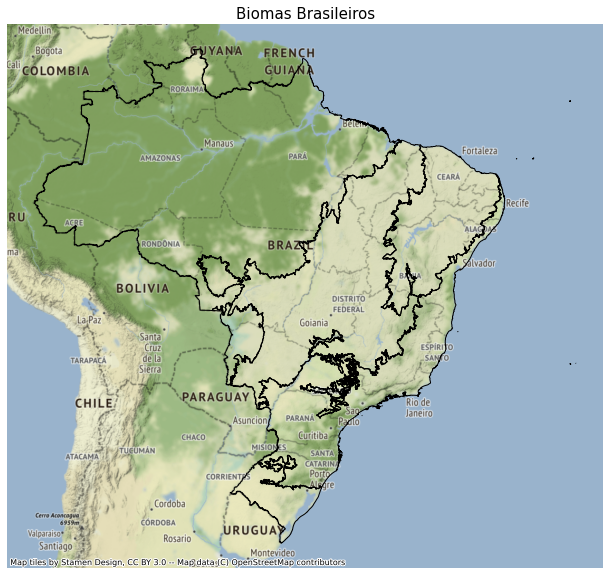

In [40]:
ax = brasil_biomas.plot(figsize=(15, 10), edgecolor='black', facecolor='none' ,legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title('Biomas Brasileiros', fontsize=15)
plt.show()



---


## testes

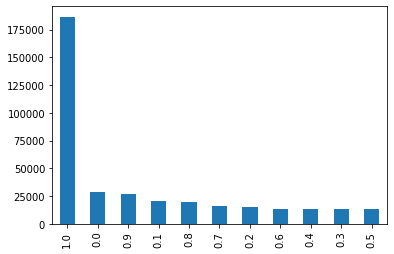

In [41]:
# compara_risco = df['riscofogo'] == 1
compara = df.riscofogo.value_counts().plot.bar()

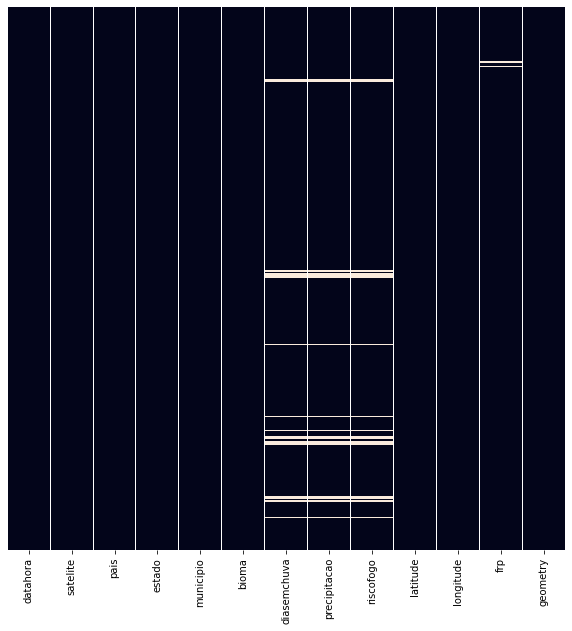

In [42]:
plt.figure(figsize = (10,10)) #Tamanho da Figura
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

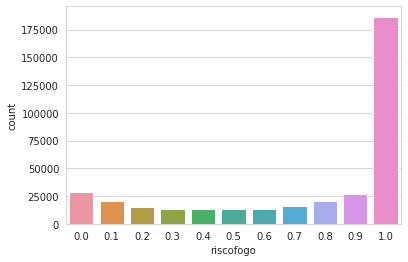

In [43]:
sns.set_style('whitegrid')
sns.countplot(x = 'riscofogo', data = df)

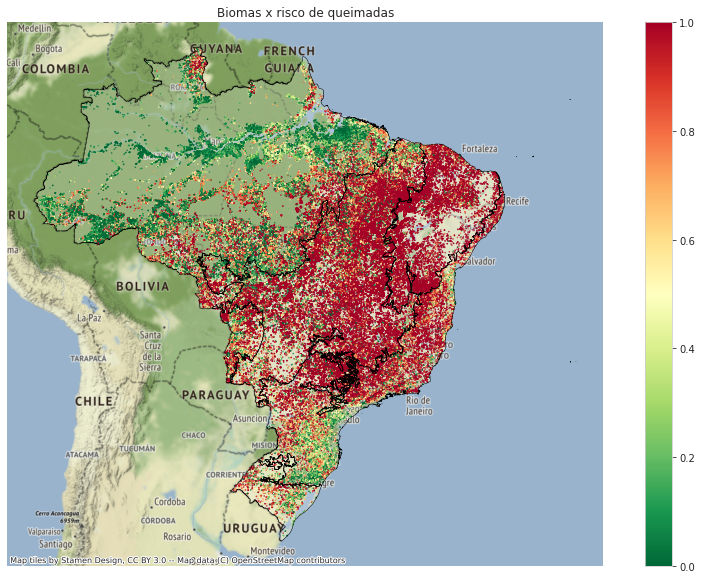

In [44]:
ax = df.plot(figsize=(15, 10), column = 'riscofogo', markersize=0.2, cmap='RdYlGn_r', legend=True, zorder=2)
brasil_biomas.plot(ax=ax, edgecolor='none', facecolor='white', alpha=.2, zorder=1)
brasil_biomas.plot(ax=ax, edgecolor='black', linewidths=0.5, facecolor='none', zorder=3)
contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title("Biomas x risco de queimadas")
plt.show()